<a href="https://colab.research.google.com/github/Tiger-A/Yandex_Data-Science/blob/master/d83ccfb7_2536_4a1f_b3bd_c84b51cb1ccb_(16).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [ ]:
import pandas as pd
import numpy as np
from textwrap import dedent
from IPython import get_ipython
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [ ]:
data = pd.read_csv("/datasets/real_estate_data.csv", sep='\t')

In [ ]:
data.head(5)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Построим гистограммы для числовых значений.

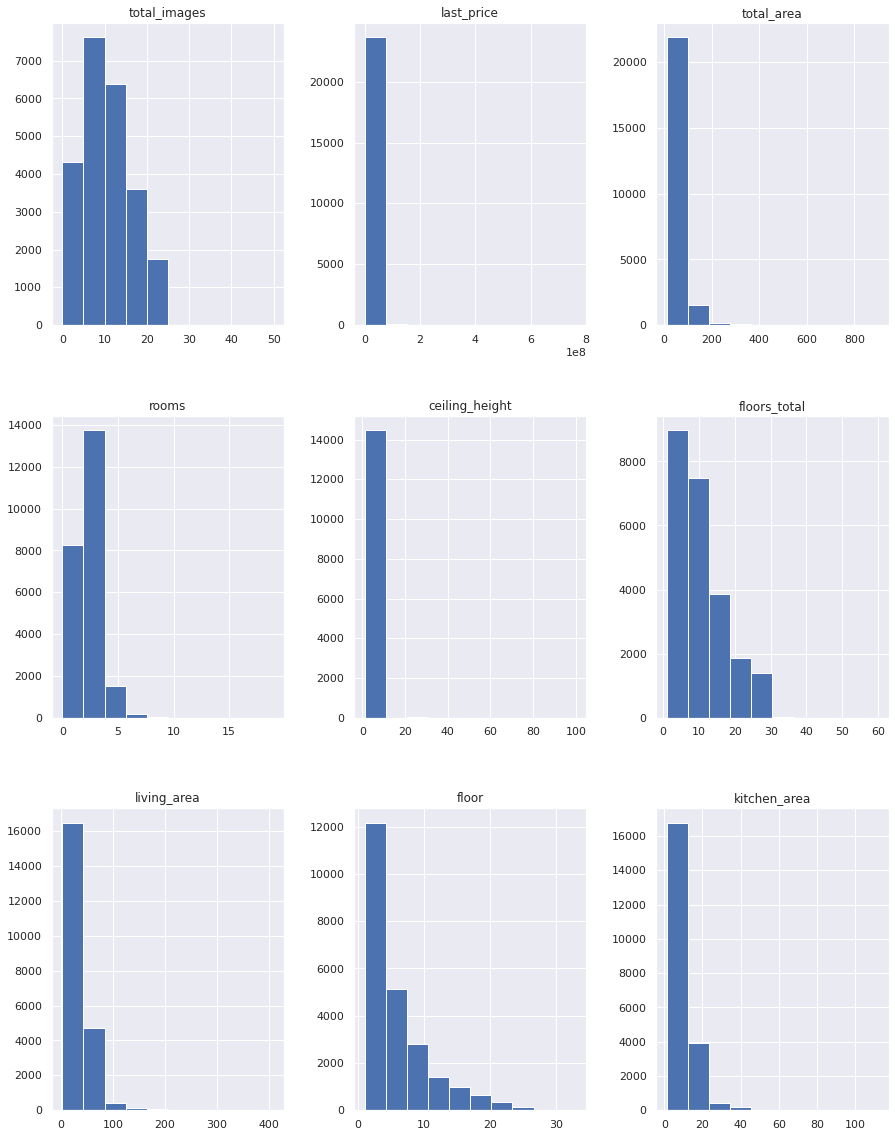

In [ ]:
data.select_dtypes(include=np.number).iloc[:, :9].hist(figsize=(15, 20))
plt.show()

Вывод:
Изучив представленные данные можем сказать, что присутствует 23698 обьекта с 22 свойствами. 


### Предобработка данных

Подготовим шаблон отчета по признакам датафрейма с помощью функций добавления новых ячеек и проверки пропущенных значений:

In [ ]:
def create_cell(shell, text):
    payload = dict(
        source='set_next_input',
        text=text,
        replace=False,
    )
    shell.payload_manager.write_payload(payload, single=False)

def generate_column_preprocess_description(df):
    shell = get_ipython()
    for i, column in reversed(list(enumerate(df.columns))):
        create_cell(shell, dedent(
            '''
            * Изменение
            '''
        ))
        create_cell(shell, dedent(
            '''
            * Вывод
            \t- Обнаруженные аномалии: ...
            \t- Причины, по которым они могли возникнуть: ...
            \t- Как исправлять: ...
            \t- Финальный тип и почему: ...
            '''
        ))
        create_cell(shell, dedent(
            f'''
            investigate_column(data["{column}"])
            '''
        ))
        create_cell(shell, dedent(
            '''
            * Изучим значения
            '''
        ))
        create_cell(shell, dedent(
            f'''
            #### {i+1}. Обработка "{column}"
            '''
        ))

In [ ]:
def investigate_column(column):
    print('Null or Na count is', column.isna().sum())
    print()
    print(column.describe())

In [ ]:
# generate_column_preprocess_description(data)


#### 1. Обработка "total_images"



* Изучим значения


In [ ]:

investigate_column(data["total_images"])


Null or Na count is 0

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64



* Вывод
	- Обнаруженные аномалии: не обнаружено.
	- Причины, по которым они могли возникнуть: нет.
	- Как исправлять: нет необходимости
	- Финальный тип и почему: int64, количество фото



#### 2. Обработка "last_price"



* Изучим значения


In [ ]:

investigate_column(data["last_price"])


Null or Na count is 0

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64



* Вывод
	- Обнаруженные аномалии: Не обнаружено. Воозможно, в современных реалиях, нессответствующе низкме цены.
	- Причины, по которым они могли возникнуть: данные за более старые года.
	- Как исправлять: нет необходимости
	- Финальный тип и почему: float64, стоимость недвижимости.



#### 3. Обработка "total_area"



* Изучим значения


In [ ]:

investigate_column(data["total_area"])


Null or Na count is 0

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64



* Вывод
	- Обнаруженные аномалии: не обнаружено
	- Причины, по которым они могли возникнуть: нет
	- Как исправлять: нет необходимости
	- Финальный тип и почему: float64, общая площадь



#### 4. Обработка "first_day_exposition"



* Изучим значения


In [ ]:

investigate_column(data["first_day_exposition"])


Null or Na count is 0

count                   23699
unique                   1491
top       2018-02-01T00:00:00
freq                      368
Name: first_day_exposition, dtype: object



* Вывод
	- Обнаруженные аномалии: нет.
	- Причины, по которым они могли возникнуть: нет.
	- Как исправлять: нет необходимости.
	- Финальный тип и почему: перевести в дату, первый день экспозиции.



* Изменение


In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M')


#### 5. Обработка "rooms"



* Изучим значения


In [ ]:

investigate_column(data["rooms"])


Null or Na count is 0

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64



* Вывод
	- Обнаруженные аномалии: нет
	- Причины, по которым они могли возникнуть: нет
	- Как исправлять: нет необходимости
	- Финальный тип и почему: int64, количество комнат



* Изменение


In [ ]:
data = data.astype({"rooms":'int'})


#### 6. Обработка "ceiling_height"



* Изучим значения


In [ ]:

investigate_column(data["ceiling_height"])


Null or Na count is 9195

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64



* Вывод
	- Обнаруженные аномалии: обнаружены пропуски в значениях и аномально большие и малые значения.
	- Причины, по которым они могли возникнуть: ошибки при вводе или выгрузке данных.
	- Как исправлять: перезапросить данные или рассмотреть их подробнее для исправления
	- Финальный тип и почему: float64, площадь



* Изменение:  
Рассмотрим значения продробнее:


In [ ]:
data['ceiling_height'].sort_values().unique()
# ceiling_height = data['ceiling_height'].unique()
# ceiling_height.sort() 
# ceiling_height

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

В списке присутсьтвуют значения логично предположить и 25 и 26, скорее всего, это опечатки и на самом деле это вещественные значения: 2.5 м и 2.6 м. Исправим это:

In [ ]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] / 10

В квартирах потолки ниже 1,7 м и более 6 м маловероятны. Удалим эти значения.

In [ ]:
data = data[(data['ceiling_height'] >= 1.7) & (data['ceiling_height'] <= 6) | (data['ceiling_height'].isna())] 


#### 7. Обработка "floors_total"



* Изучим значения


In [ ]:

investigate_column(data["floors_total"])


Null or Na count is 86

count    23604.000000
mean        10.674038
std          6.597565
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64



* Вывод
	- Обнаруженные аномалии: обнаруженены пропуски
	- Причины, по которым они могли возникнуть: ошибки при вводе, выгрузке данных.
	- Как исправлять: перезапросить данные или рассмотреть их подробнее для исправления
	- Финальный тип и почему: int64, количество этажей здания.



* Изменение:
переведем в целочисленные значения и удалим незаполненные:


In [ ]:
data = data.astype({"floors_total":'Int64'})

In [ ]:
data = data.dropna(subset=['floors_total'])


#### 8. Обработка "living_area"



* Изучим значения


In [ ]:

investigate_column(data["living_area"])


Null or Na count is 1870

count    21734.000000
mean        34.466635
std         22.040424
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64



* Вывод
	- Обнаруженные аномалии: присутствуют пропускии аномально малые значения.
	- Причины, по которым они могли возникнуть: ошибки при вводе, выгрузке данных.
	- Как исправлять: перезапросить данные или рассмотреть их подробнее для исправления
	- Финальный тип и почему: float64, жилая площадь



#### 9. Обработка "floor"



* Изучим значения


In [ ]:

investigate_column(data["floor"])


Null or Na count is 0

count    23604.000000
mean         5.877351
std          4.873470
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64



* Вывод
	- Обнаруженные аномалии: нет
	- Причины, по которым они могли возникнуть: нет
	- Как исправлять: нет необходимости
	- Финальный тип и почему: Int, этаж



* Изменение:
    переведем в целочисленные значения


In [ ]:
data = data.astype({"floor":'Int64'})


#### 10. Обработка "is_apartment"



* Изучим значения


In [ ]:

investigate_column(data["is_apartment"])


Null or Na count is 20831

count      2773
unique        2
top       False
freq       2724
Name: is_apartment, dtype: object



* Вывод
	- Обнаруженные аномалии: присутствуют пропуски
	- Причины, по которым они могли возникнуть: ошибки при вводе, выгрузке данных, нежелание продавца указывать принадлежность к этому сегменту недвижимости.
	- Как исправлять: перезапросить данные
	- Финальный тип и почему: bool, апартаменты (да/нет)



* Изменение
приведем к типу bool:



In [ ]:
data = data.astype({"is_apartment":'bool'})


#### 13. Обработка "kitchen_area"



* Изучим значения


In [ ]:

investigate_column(data["kitchen_area"])


Null or Na count is 2229

count    21375.000000
mean        10.564832
std          5.905070
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


In [ ]:
kitchen_area = data['kitchen_area'].unique()
kitchen_area.sort() 
kitchen_area

array([  1.3 ,   2.  ,   2.3 ,   2.4 ,   2.89,   3.  ,   3.2 ,   3.3 ,
         3.4 ,   3.5 ,   3.7 ,   3.8 ,   4.  ,   4.1 ,   4.2 ,   4.3 ,
         4.4 ,   4.5 ,   4.6 ,   4.7 ,   4.8 ,   4.9 ,   5.  ,   5.04,
         5.06,   5.1 ,   5.14,   5.2 ,   5.21,   5.23,   5.25,   5.28,
         5.29,   5.3 ,   5.31,   5.33,   5.35,   5.4 ,   5.42,   5.44,
         5.47,   5.49,   5.5 ,   5.53,   5.59,   5.6 ,   5.61,   5.62,
         5.64,   5.65,   5.68,   5.7 ,   5.74,   5.75,   5.78,   5.8 ,
         5.82,   5.85,   5.86,   5.9 ,   5.91,   6.  ,   6.02,   6.03,
         6.1 ,   6.16,   6.19,   6.2 ,   6.22,   6.23,   6.24,   6.25,
         6.26,   6.27,   6.28,   6.3 ,   6.31,   6.33,   6.35,   6.36,
         6.37,   6.4 ,   6.47,   6.5 ,   6.55,   6.58,   6.6 ,   6.61,
         6.62,   6.65,   6.7 ,   6.72,   6.73,   6.76,   6.77,   6.8 ,
         6.82,   6.83,   6.84,   6.86,   6.9 ,   6.91,   6.93,   6.95,
         7.  ,   7.02,   7.03,   7.06,   7.09,   7.1 ,   7.12,   7.15,
      

* Вывод
	- Обнаруженные аномалии: пропуски, аномально малые, большие значения.
	- Причины, по которым они могли возникнуть: ошибки при вводе, выгрузке данных, нежелание продавца указывать маленькую площадь
	- Как исправлять: перезапросить данные или рассмотреть их подробнее для исправления. Вероятно, значения более 50 кв*м, это опечатки и, возможно, есть смысл разделить их на 10. Но в Санкт-петербурге много различных старых зданий с не стандартными планировками и в обьявлениях встречаются кухни (кухни-гостинные) более 7о кв*м. В связи с тем, что изменные значения могут повлиять на дальнейший анализ - оставим без изменений.
	- Финальный тип и почему: float64, площадь кухни



#### 14. Обработка "balcony"



* Изучим значения


In [ ]:

investigate_column(data["balcony"])


Null or Na count is 11475

count    12129.000000
mean         1.153846
std          1.070600
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64



* Вывод
	- Обнаруженные аномалии: пропуски
	- Причины, по которым они могли возникнуть: ошибки при вводе, выгрузке данных, возможно, причина пропусков - отстутствие балконов.
	- Как исправлять: заменить отсутствующие значение на 0.
	- Финальный тип и почему: int, количество балконов.



* Изменение:
заменим отсутствующие значения на 0 и приведем к целочисленным значениям:


In [ ]:
data['balcony'] = data['balcony'].fillna(0)


In [ ]:
data = data.astype({'balcony':'int'})


#### 15. Обработка "locality_name"



* Изучим значения


In [ ]:

investigate_column(data["locality_name"])


Null or Na count is 48

count               23556
unique                364
top       Санкт-Петербург
freq                15645
Name: locality_name, dtype: object


In [ ]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '


* Выво
	- Обнаруженные аномалии: пропуски, буква "ё", поселок =  посёлок
	- Причины, по которым они могли возникнуть: ошибки при вводе, выгрузке данных.
	- Как исправлять: заменить: буква "ё", поселок =  посёлок, удалить значения с пропусками как неиндентифицируемые.
	- Финальный тип и почему: str, название населенного пункта



* Изменение:  
заменим "посёлок" на "поселок", удалим объекты с пропуском в свойстве.


In [ ]:
data['locality_name'] = data['locality_name'].str.replace('посёлок', 'поселок')

In [ ]:
data = data.dropna(subset=['locality_name'])


#### 16. Обработка "airports_nearest"



* Изучим значения


In [ ]:

investigate_column(data["airports_nearest"])


Null or Na count is 5522

count    18034.000000
mean     28797.748031
std      12633.659614
min          0.000000
25%      18567.000000
50%      26756.500000
75%      37274.500000
max      84869.000000
Name: airports_nearest, dtype: float64



* Вывод
	- Обнаруженные аномалии: пропуски, минимальное значение = 0.
	- Причины, по которым они могли возникнуть: ошибки при вводе, выгрузке данных, возможно минимальное значение = 0 если  земельный участк дома прилегает к территори аэропорта?
	- Как исправлять: перезапросить данные
	- Финальный тип и почему: int, расстояние в м



* Изменение
приведем к целочисленным значениям:

In [ ]:
data = data.astype({'airports_nearest':'Int64'})


#### 17. Обработка "cityCenters_nearest"



* Изучим значения


In [ ]:

investigate_column(data["cityCenters_nearest"])


Null or Na count is 5499

count    18057.000000
mean     14192.735947
std       8614.199690
min        181.000000
25%       9238.000000
50%      13098.000000
75%      16285.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64



* Вывод
	- Обнаруженные аномалии: пропуски.
	- Причины, по которым они могли возникнуть: ошибки при вводе, выгрузке данных
	- Как исправлять: перезапросить данные
	- Финальный тип и почему: int, расстояние в м



* Изменение
приведем к целочисленным значениям:


In [ ]:
data = data.astype({'cityCenters_nearest':'Int64'})


#### 18. Обработка "parks_around3000"



* Изучим значения


In [ ]:

investigate_column(data["parks_around3000"])


Null or Na count is 5498

count    18058.000000
mean         0.611474
std          0.802061
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64



* Вывод
	- Обнаруженные аномалии: пропуски.
	- Причины, по которым они могли возникнуть: ошибки при вводе, выгрузке данных
	- Как исправлять: перезапросить данные
	- Финальный тип и почему: int, количество



* Изменение
приведем к целочисленным значениям:

In [ ]:
data = data.astype({'parks_around3000':'Int64'})


#### 19. Обработка "parks_nearest"



* Изучим значения


In [ ]:

investigate_column(data["parks_nearest"])


Null or Na count is 15530

count    8026.000000
mean      490.615749
std       341.627576
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64



* Вывод
	- Обнаруженные аномалии: пропуски.
	- Причины, по которым они могли возникнуть: ошибки при вводе, выгрузке данных
	- Как исправлять: перезапросить данные
	- Финальный тип и почему: int, расстояние.



* Изменение приведем к целочисленным значениям:


In [ ]:
data = data.astype({"parks_nearest":'Int64'})


#### 20. Обработка "ponds_around3000"



* Изучим значения


In [ ]:

investigate_column(data["ponds_around3000"])


Null or Na count is 5498

count    18058.000000
mean         0.769354
std          0.938561
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64



* Вывод
	- Обнаруженные аномалии: пропуски.
	- Причины, по которым они могли возникнуть: ошибки при вводе, выгрузке данных
	- Как исправлять: перезапросить данные, количество пропусков совпадает с "parks_around3000", возможно причина аналогичная.  
	- Финальный тип и почему: int, количество.



* Изменение приведем к целочисленным значениям:


In [ ]:
data = data.astype({"ponds_around3000":'Int64'})


#### 21. Обработка "ponds_nearest"



* Изучим значения


In [ ]:

investigate_column(data["ponds_nearest"])


Null or Na count is 14524

count    9032.000000
mean      518.366032
std       278.010449
min        13.000000
25%       293.000000
50%       503.000000
75%       730.000000
max      1344.000000
Name: ponds_nearest, dtype: float64



* Вывод
	- Обнаруженные аномалии: пропуски.
	- Причины, по которым они могли возникнуть: ошибки при вводе, выгрузке данных
	- Как исправлять: перезапросить данные
	- Финальный тип и почему: int, расстояние, м



* Изменение приведем к целочисленным значениям:


In [ ]:
data = data.astype({"ponds_nearest":'Int64'})


#### 22. Обработка "days_exposition"



* Изучим значения


In [ ]:

investigate_column(data["days_exposition"])


Null or Na count is 3171

count    20385.000000
mean       180.732254
std        219.750161
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64



* Вывод
	- Обнаруженные аномалии: пропуски.
	- Причины, по которым они могли возникнуть: ошибки при вводе, выгрузке данных
	- Как исправлять: перезапросить данные
	- Финальный тип и почему: int, количество, дней.



* Изменение
приведем к целочисленным значениям:


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23556 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23556 non-null  int64         
 1   last_price            23556 non-null  float64       
 2   total_area            23556 non-null  float64       
 3   first_day_exposition  23556 non-null  datetime64[ns]
 4   rooms                 23556 non-null  int64         
 5   ceiling_height        14472 non-null  float64       
 6   floors_total          23556 non-null  Int64         
 7   living_area           21691 non-null  float64       
 8   floor                 23556 non-null  Int64         
 9   is_apartment          23556 non-null  bool          
 10  studio                23556 non-null  bool          
 11  open_plan             23556 non-null  bool          
 12  kitchen_area          21336 non-null  float64       
 13  balcony         

In [ ]:
# data['days_exposition'] = pd.to_numeric(data['days_exposition'], errors = "coerse")
# data['days_exposition'].unique()
# data = data.astype({"days_exposition":'Int64'})
# data = data.convert_dtypes()

### Посчитайте и добавьте в таблицу новые столбцы

 Добавим в таблицу новые столбцы со следующими параметрами:

1. Цена одного квадратного метра:

In [ ]:
data['price_one_square'] = (data['last_price'] / data['total_area']).astype(int)

2. день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)


In [ ]:
data['weekday_public'] = data['first_day_exposition'].dt.weekday

3. Месяц публикации объявления

In [ ]:
data['month_public'] = data['first_day_exposition'].dt.month

4. Год публикации объявления:

In [ ]:
data['year_public'] = data['first_day_exposition'].dt.year

5. Тип этажа квартиры (значения — «‎первый», «последний», «другой»):

In [ ]:
# Напишем функцию для определения этажа
def floor_type(row):
    if row['floor'] == 1:
        return "first"
    elif row['floor'] == row['floors_total']:
        return "last"
    else:
        return "another"

In [ ]:
data['floor_type'] = data.apply(floor_type, axis=1)

6. Расстояние до центра города в километрах (переведем из м в км и округлим до целых значений)

In [ ]:
data['distance_to_center_km'] = data['cityCenters_nearest'] / 1000


In [ ]:
data['distance_to_center_km'] = (data[~data['distance_to_center_km'].isna()])


### Проведите исследовательский анализ данных

Изучите следующие параметры объектов:
общая площадь;
жилая площадь;
площадь кухни;
цена объекта;
количество комнат;
высота потолков;
этаж квартиры;
тип этажа квартиры («первый», «последний», «другой»);
общее количество этажей в доме;
расстояние до центра города в метрах;
расстояние до ближайшего аэропорта;
расстояние до ближайшего парка;
день и месяц публикации объявления.
Постройте отдельные гистограммы для каждого из этих параметров. Опишите все ваши наблюдения по параметрам в ячейке с типом markdown.

Для построения гистограмм поготовим фукцию с параметрами: признак, название оси х, подпись диаграммы, верхняя граница диапазона, нижняя граница, количество корзин

In [ ]:
def buildHist(data, xname, title, range_min, range_max, bin):
    plt.figure(figsize=(10, 3))
    data.hist(range=(range_min, range_max), bins=bin)
    plt.xlabel(xname)
    plt.title(title)
    plt.ticklabel_format(style='plain') # убираем scientific notation
    plt.show()

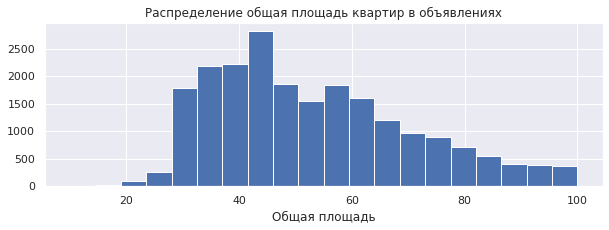

In [ ]:
buildHist(data.total_area, 'Общая площадь', 'Распределение общая площадь квартир в объявлениях', 10, 100, 20)

На графике видим, что в большинстве объявлений квартиры общей площадью 45 кв*м.

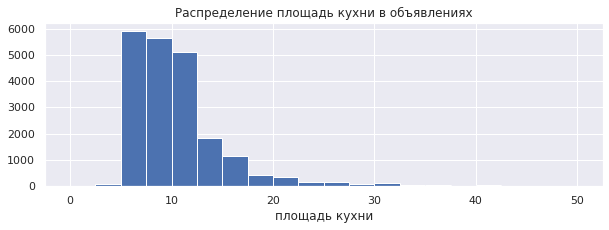

In [ ]:
buildHist(data.kitchen_area, 'площадь кухни', 'Распределение площадь кухни в объявлениях', 0, 50, 20)

На графике видим, что в большинстве объявлений площадь кухни 5-12 кв*м.

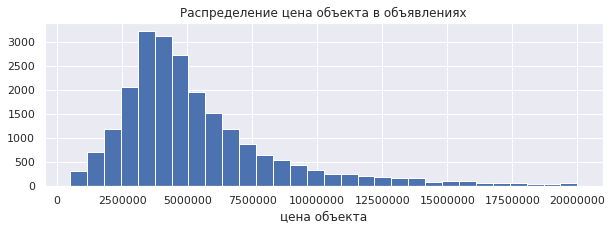

In [ ]:
buildHist(data.last_price, 'цена объекта', 'Распределение цена объекта в объявлениях', 500000, 20000000, 30)

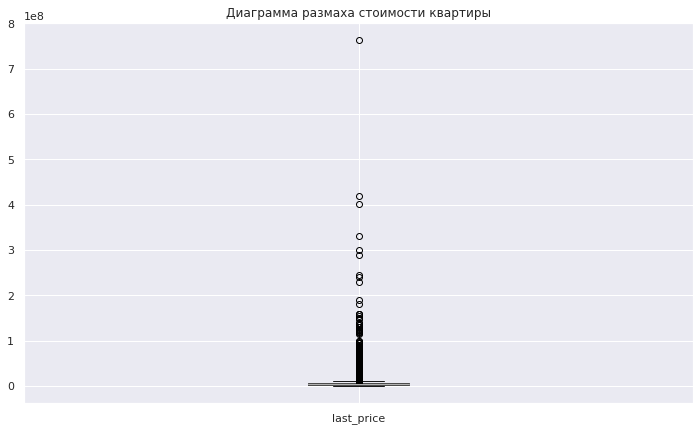

In [ ]:
data.boxplot(column='last_price', figsize=(12, 7))
plt.title('Диаграмма размаха стоимости квартиры')
plt.show() 

# q1 = data.last_price.quantile(0.25)
# q3 = data.last_price.quantile(0.75)
# iqr = q3 - q1
# dfq = data.query('last_price <= @q3 + 1.5 * @iqr')
# "Мы отрезали {:.1%} данных".format(1 - dfq.shape[0] / data.shape[0])
# dfq.last_price.plot.box()
# sns.histplot(data=dfq, x='last_price', kde=True)



Избавимся от выбросов в столбце 'last_price'

In [ ]:
data_drop_pice = data.query('last_price > 400000 and last_price < 11800000')

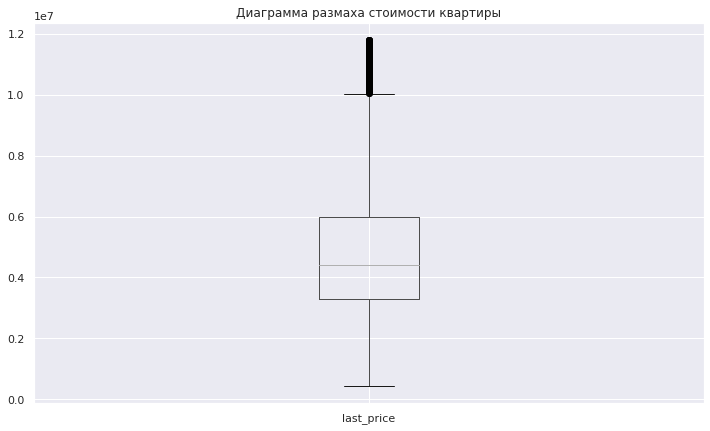

In [ ]:
data_drop_pice.boxplot(column='last_price', figsize=(12, 7))
plt.title('Диаграмма размаха стоимости квартиры')
plt.show() 

На диаграмме видим, что в большинстве объявлений стоимость составляет около 4.5 млн руб.

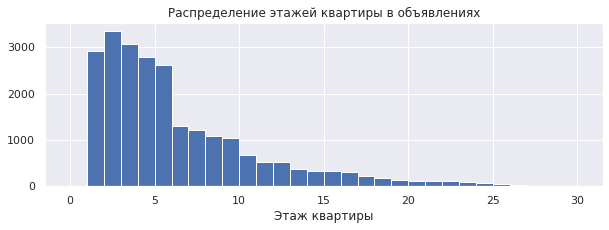

In [ ]:
buildHist(data.floor, 'Этаж квартиры', 'Распределение этажей квартиры в объявлениях', 00000, 30, 30)

На графике видим, что в большинстве объявлений указан 3 этаж квартиры.

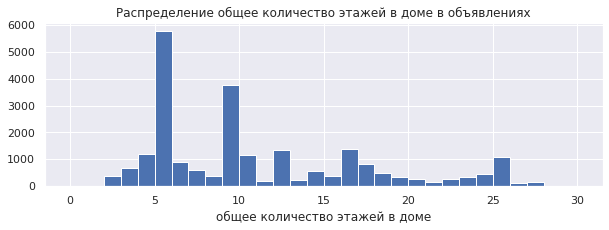

In [ ]:
buildHist(data.floors_total, 'общее количество этажей в доме', 'Распределение общее количество этажей в доме в объявлениях', 0, 30, 30)

На графике видим, что в большинстве объявлений этажные дома.

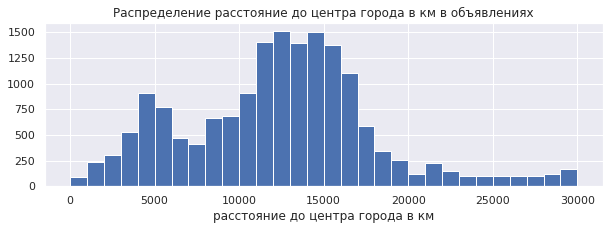

In [ ]:
buildHist(data.cityCenters_nearest, 'расстояние до центра города в км', 'Распределение расстояние до центра города в км в объявлениях', 0, 30000, 30)

На графике видим, что в большинстве  обьявлений от 11 до 16 км от центра города


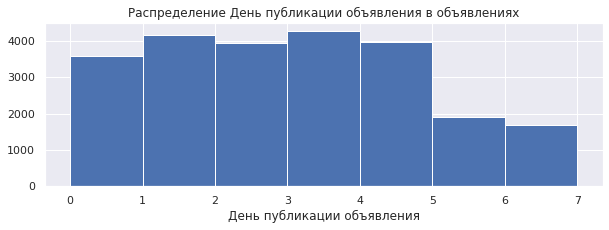

In [ ]:
buildHist(data.weekday_public, 'День публикации объявления', 'Распределение День публикации объявления в объявлениях', 0, 7, 7)

На графике видим, что в большинство обьявлений опубликовано в среду.

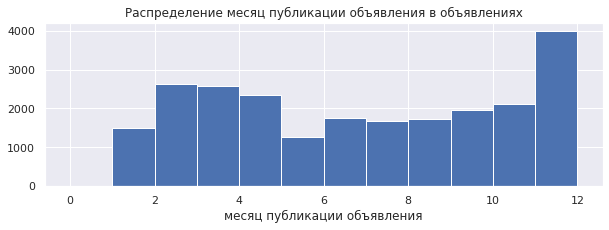

In [ ]:
buildHist(data.month_public, 'месяц публикации объявления', 'Распределение месяц публикации объявления в объявлениях', 0, 12, 12)

На графике видим, что в большинство обьявлений опубликовано в декабре

Изучим, как быстро продавались квартиры:

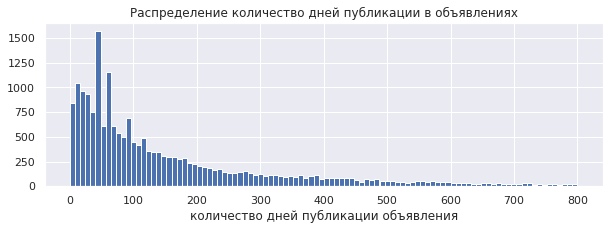

In [ ]:
buildHist(data.days_exposition, 'количество дней публикации объявления', 'Распределение количество дней публикации в объявлениях', 0, 800, 100)

На графике видим, что большинство обьявлений публиковались в течении 45-55 дней.

In [ ]:
data['days_exposition'].describe()

count    20385.000000
mean       180.732254
std        219.750161
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Вывод:
Исходя из представленных данных продажа обычно занимает около 50 дней. Есть объявления срок размещения которых в районе 1 дня, вероятнее всео они ошибочные. обявления в пределах до 40 дней можно считать быстрыми, есть так же и необычно долгимие со сроком публикации более 2 лет. Возможно это лоты с очень большой ценой (эксклюзивные обьекты, обьекты с большой площадью), возможно их необходимо выделить отдельно и провести анализ.

Избавимся от выбросов и аномалий:
Благодаря проделанному выше анализу, можем оптимизировать на датафрейм по следеющим параметрам
* Общая площадь:  < 120
* Цена: от 400 до 12000
* Количество комнат: до 6
* Высота потолка: от 2 до  4
* Дней продажи: 0 до 500

In [ ]:

clear_data = (
    data
    .query('total_area < 120 and last_price > 400000 and last_price < 12000000 and rooms < 6 and ceiling_height > 2 and ceiling_height < 4 and days_exposition > 0 and days_exposition < 500')
)

Изучим, зависит ли цена от:

- общей площади

Коэффициент корреляции: 0.654


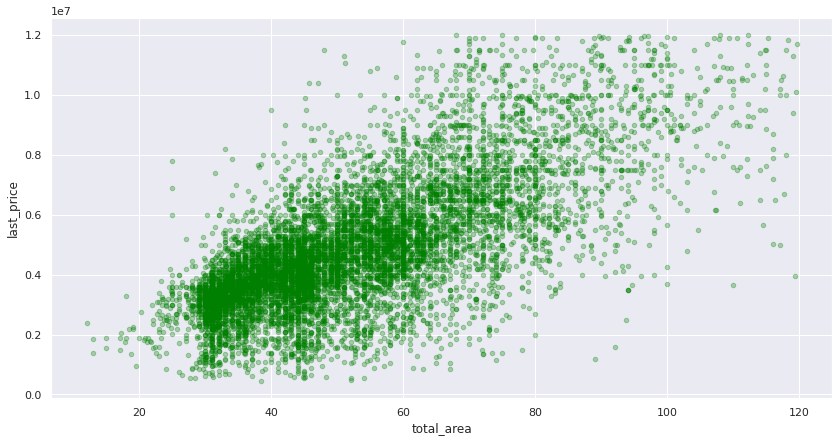

In [ ]:
clear_data.plot(x='total_area', y='last_price', kind='scatter', color='green', alpha=0.3, grid=True, figsize=(14, 7))
corr_area = data['last_price'].corr(data['total_area'])
print('Коэффициент корреляции:', '{:.3f}'.format(corr_area))
# hw.plot(x='height', y='weight', kind='scatter', alpha=0.003)

Анализ показал, что коэффициент корреляции Пирсона равен почти __0.7__, это говорит о том, что между параметрами "цена" и "общая площадь" имеется положительная корреляция -  c прямой зависимостью. 

- жилой площади

Коэффициент корреляции: 0.566


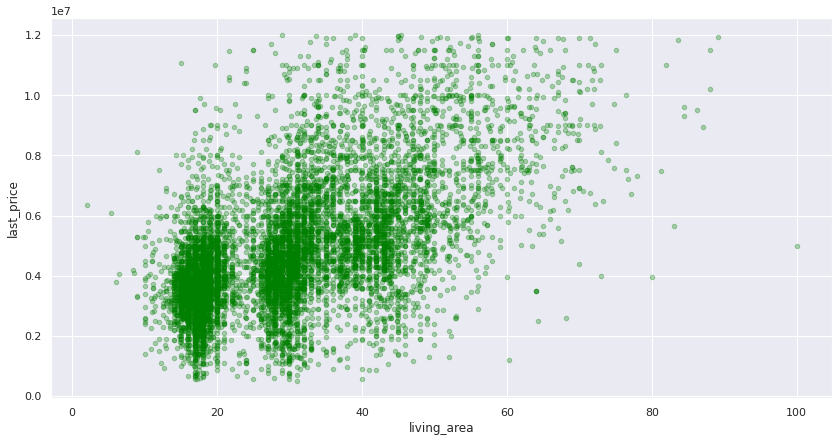

In [ ]:
clear_data.plot(x='living_area', y='last_price', kind='scatter', color='green', alpha=0.3, grid=True, figsize=(14, 7))
corr_area = data['last_price'].corr(data['living_area'])
print('Коэффициент корреляции:', '{:.3f}'.format(corr_area))

Анализ показал, что коэффициент корреляции Пирсона равен почти 0.6, это говорит о том, что между параметрами "цена" и "жилая площадь" имеется положительная корреляция - c прямой зависимостью.

- количество комнат

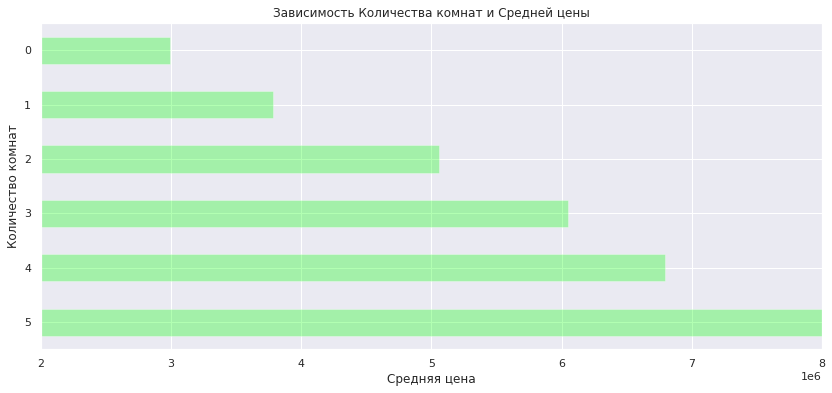

In [ ]:
(
    clear_data
    .pivot_table(index = 'rooms', values = 'last_price', aggfunc= 'mean')
    .sort_values(by='last_price', ascending=False)
    .plot(y='last_price', kind='barh', color='lime', title='Зависимость Количества комнат и Средней цены', figsize=(14, 6), legend=False, alpha=0.3, grid=True, xlim=(2000000, 8000000))
)
plt.xlabel('Средняя цена')
plt.ylabel('Количество комнат')
plt.show()

На графике видим прямую зависимость стоимости от количества комнат.

- типа этажа, на котором расположена квартира (первый, последний, другой)

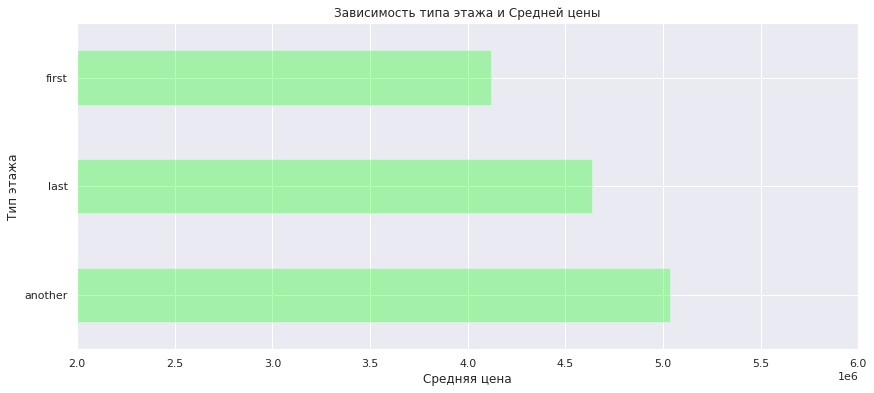

In [ ]:
(
    clear_data
    .pivot_table(index = 'floor_type', values = 'last_price', aggfunc= 'mean')
    .sort_values(by='last_price', ascending=False)
    .plot(y='last_price', kind='barh', color='lime', title='Зависимость типа этажа и Средней цены', figsize=(14, 6), legend=False, alpha=0.3, grid=True, xlim=(2000000, 6000000))
)
plt.xlabel('Средняя цена')
plt.ylabel('Тип этажа')
plt.show()

Прослеживается прямая зависость межу типом этажа и средней стоимостью.

 -даты размещения: 

-- день

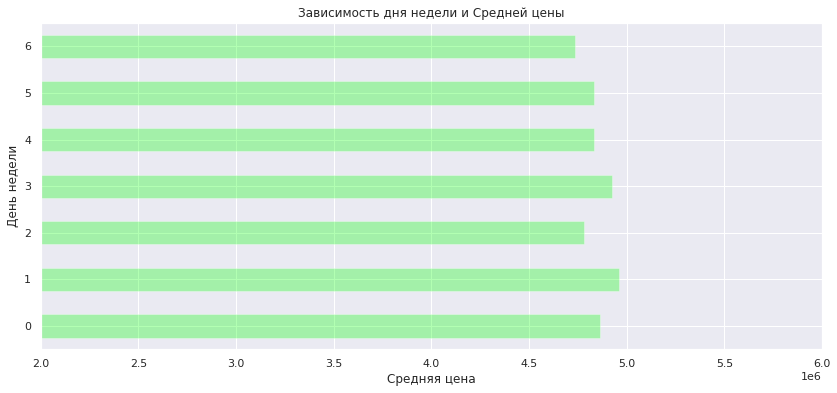

In [ ]:
(
    clear_data
    .pivot_table(index = 'weekday_public', values = 'last_price', aggfunc= 'mean')
#     .sort_values(by='last_price', ascending=False)
    .plot(y='last_price', kind='barh', color='lime', title='Зависимость дня недели и Средней цены', figsize=(14, 6), legend=False, alpha=0.3, grid=True, xlim=(2000000, 6000000))
)
plt.xlabel('Средняя цена')
plt.ylabel('День недели')
plt.show()

Сильной зависимости не прослеживается, но есть небольшая теденция к более высокой средней цене у обьявлений, опубликованных в начале недели.

-- месяц

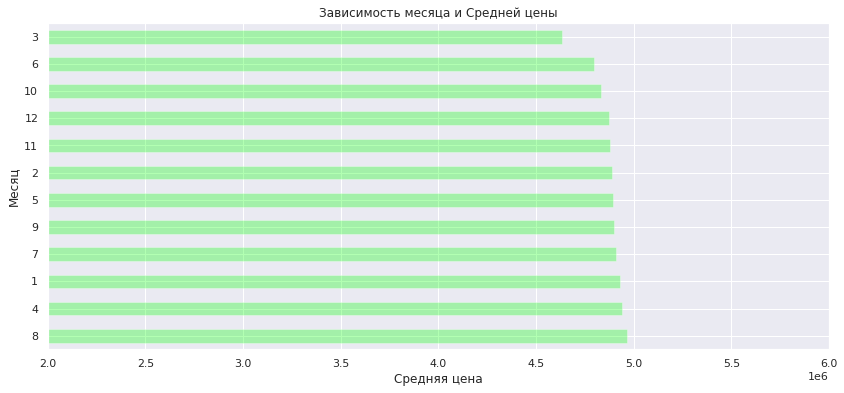

In [ ]:
(
    clear_data
    .pivot_table(index = 'month_public', values = 'last_price', aggfunc= 'mean')
    .sort_values(by='last_price', ascending=False)
    .plot(y='last_price', kind='barh', color='lime', title='Зависимость месяца и Средней цены', figsize=(14, 6), legend=False, alpha=0.3, grid=True, xlim=(2000000, 6000000))
)
plt.xlabel('Средняя цена')
plt.ylabel('Месяц')
plt.show()

Максимальная цена - август. Возможно связана с возвращением всех из отпусков? Апрель?

-- год

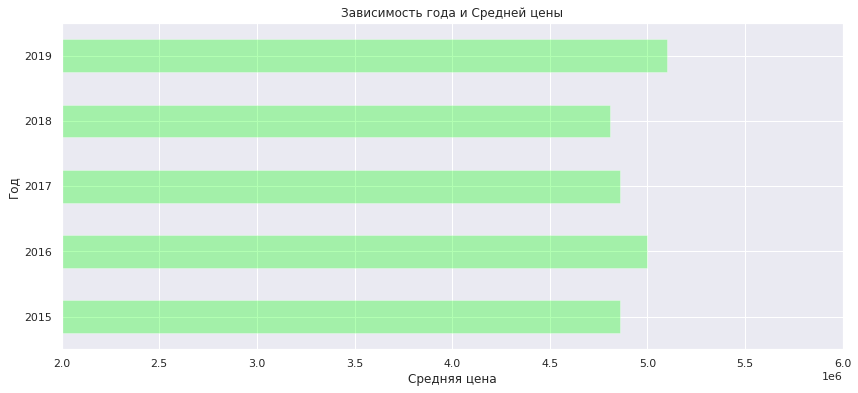

In [ ]:
(
    clear_data
    .pivot_table(index = 'year_public', values = 'last_price', aggfunc= 'mean')
#     .sort_values(by='last_price', ascending=False)
    .plot(y='last_price', kind='barh', color='lime', title='Зависимость года и Средней цены', figsize=(14, 6), legend=False, alpha=0.3, grid=True, xlim=(2000000, 6000000))
)
plt.xlabel('Средняя цена')
plt.ylabel('Год')
plt.show()

В 2019 году, благодаря, вероятнее всего "поддержке" строительной отрасли Правительством (льготное ипотечное кредитование) итд, начался скачок цен на жилую недвижимость.

*Выводы:*
Из всех исследованных выше зависимостей, больше всего на стоимость вляет:
- общая площадь квартиры
- количество комнат
- этаж квартиры.
  

In [ ]:
data.info()

In [ ]:
# pd.plotting.scatter_matrix(data['total_area', 'last_price', 'rooms', 'ceiling_height'], figsize=(9, 9)) 

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. 

In [ ]:
stat = data.pivot_table(index = 'locality_name',  values = 'price_one_square')
# .sort_values('price_one_square').head(10)

In [ ]:
stat

In [ ]:
stat.min()

In [ ]:
stat.max()

In [ ]:
s = data.groupby('locality_name')['locality_name'].count().sort_values()
# .sort_values('locality_name',  values = 'price_one_square').head(10)

<a id="num45"></a>
## 4.5. Топ-10 населённых пунктов
Для ответа на данный вопрос, необходимо изучить следующие параметры:
1. Населённые пункты с __наибольшим числом объявлений__
2. Средняя цена __квадратного метра__ в этих населённых пунктах
3. Населённые пункты с самой __высокой__ и __низкой__ стоимостью жилья

Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. 
Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.
#####  Населённые пункты с наибольшим числом объявлений
Для начала подсчитаю количество объявлений для каждого населённого пункта и выведу только 10 населённых пунктов с наибольшим числом объявлений.

In [ ]:
( 
    clear_estate_data
    .pivot_table(index='locality_name', values='last_price', aggfunc='count')
    .sort_values(by='last_price', ascending=False)
    .head(10)
)




In [ ]:
( # Из df 'clear_estate_data' беру только населённые пункты из списка полученного в пункте 4.5.1
    clear_estate_data # Формирую таблицу по среднему значению за кв.м. для каждого населённого пункта
    .query('locality_name == "Санкт-Петербург" | locality_name == "посёлок Мурино" | locality_name == "посёлок Шушары" | locality_name == "Всеволожск" | locality_name == "Колпино" | locality_name == "посёлок Парголово" | locality_name == "деревня Кудрово" | locality_name == "Пушкин" | locality_name == "Гатчина" | locality_name == "Выборг"')
    .pivot_table(index='locality_name', values='cost_area', aggfunc='mean')
    .sort_values(by='cost_area', ascending=False)
)

всем привет. Вот мне что ревьюер написал: Для изучения зависимости цены от площадей лучше подойдут scatter-plot'ы, это возвращаясь к вчерашнему разговору про то, какой график правильнее

In [ ]:
data.last_price.plot.box()

In [ ]:
data.last_price.describe()

In [ ]:
s

через сводные. В индекс - название нас. пункта, values - цена за кв.м. Потом эту таблицу сортировала и через head выводила первые 10 значений



Anastasiia, [2/12/2023 9:08 AM]
Я сейчас не дома, но на память строила таблицу сводную. 
Кажется так: df.pivot_table(index=[“locality_name”, “km_city_centers”], values=“last_price_”]).index_reset()

Потом по условию сохранила в переменой только Санкт-Петербург с сортировкой ascending False с head (10)

Anastasiia, [2/12/2023 9:12 AM]
Результат сводной сохраняла в переменную, чтобы потом делать условие и сортировку по нему

Anastasiia, [2/12/2023 9:12 AM]
Но я только вчера отправила проект, так что может не так))

Anastasiia, [2/12/2023 9:19 AM]
Это о 10 населенных пунктах, второе задание аналогично делала,

Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

Я сейчас не дома, но на память строила таблицу сводную. 
Кажется так: df.pivot_table(index=[“locality_name”, “km_city_centers”], values=“last_price_”]).index_reset()

Потом по условию сохранила в переменой только Санкт-Петербург с сортировкой ascending False с head (10)

Результат сводной сохраняла в переменную, чтобы потом делать условие и сортировку по нему

Someone, [2/6/2023 9:41 PM]
сделай таблицу pivot засунь в индекс километраж, в значения стоимость, в функции забей среднее или медиану

Someone, [2/6/2023 9:41 PM]
и потом строится по ней такая таблица

Someone, [2/6/2023 9:41 PM]


Someone, [2/6/2023 9:42 PM]
ты по сути вычисляешь среднее (или медиану) по всем домам, расположенном на каждом километре

### Общий вывод

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [ ]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [ ]  определены пропущенные значения
- [ ]  заполнены пропущенные значения там, где это возможно
- [ ]  есть пояснение, какие пропущенные значения обнаружены
- [ ]  изменены типы данных
- [ ]  есть пояснение, в каких столбцах изменены типы и почему
- [ ]  устранены неявные дубликаты в названиях населённых пунктов
- [ ]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [ ]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [ ]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [ ]  посчитано и добавлено в таблицу: месяц публикации объявления
- [ ]  посчитано и добавлено в таблицу: год публикации объявления
- [ ]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [ ]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [ ]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [ ]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [ ]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [ ]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [ ]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [ ]  в каждом этапе есть промежуточные выводы
- [ ]  есть общий вывод